#  Analysing, visualising and simulations
Dataset about Stars
Names of files correspond to a snapshot of the simulation at time t (0s, 1s, ...)
x, y, z - positions of the stars;
vx, vy, vz - velocity;
m - mass of each star;
id - specific number of star

In [122]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

In [123]:
files = os.listdir("C:/Users/angel/AppData/Local/Programs/Python/Sieci VSCode/sieci/dwanascie_projektow/Stars/input")
print(files)
# print(len(files)) # 19

['C0.csv', 'C1.csv', 'C10.csv', 'C11.csv', 'C12.csv', 'C13.csv', 'C14.csv', 'C15.csv', 'C16.csv', 'C17.csv', 'C18.csv', 'C2.csv', 'C3.csv', 'C4.csv', 'C5.csv', 'C6.csv', 'C7.csv', 'C8.csv', 'C9.csv']


In [124]:
dane = [0 for _ in range(len(files))]
for i in range(len(files)):
    dane[i] = pd.read_csv("C:/Users/angel/AppData/Local/Programs/Python/Sieci VSCode/sieci/dwanascie_projektow/Stars/input/C" + str(i) + ".csv")

Add some new values

In [125]:
for i in range(len(dane)):
    dane[i]['t'] = 0 + (i + 1) * 100
    dane[i]['v'] = np.sqrt(dane[i].vx**2 + dane[i].vy**2 + dane[i].vz**2)
    dane[i]['Ec'] = 0.5*dane[i].m*(dane[i].v)**2
    dane[i]['r'] = np.sqrt(dane[i].x**2 + dane[i].y**2 + dane[i].z**2)

In [126]:
# checking the length of each element in this list - isn't the same  
# This is because some particles escape the cluster.
for i in range(len(dane)):
    print("Dane[" + str(i) + "]" , len(dane[i]))

Dane[0] 64000
Dane[1] 63997
Dane[2] 63995
Dane[3] 63993
Dane[4] 63992
Dane[5] 63990
Dane[6] 63989
Dane[7] 63987
Dane[8] 63985
Dane[9] 63984
Dane[10] 63983
Dane[11] 63983
Dane[12] 63981
Dane[13] 63981
Dane[14] 63978
Dane[15] 63977
Dane[16] 63976
Dane[17] 63973
Dane[18] 63970


Let's print beginning of each element in the list (element is from specific csv)

In [127]:
class Analysis:
    def __init__(self, data):
        self.data = data
    
    def heads(self): # print the begining of each element
        print(self.data[:5])

In [128]:
def print_heads():
    for i, element in enumerate(dane):
        print("\nPart {} of 'dane' list".format(i))
        Analysis(element).heads()
print_heads()


Part 0 of 'dane' list
          x         y         z        vx        vy        vz         m  id  \
0  0.485939 -0.524359 -0.531982  0.461539 -0.033776 -0.322765  0.000016   1   
1 -0.065961  0.080844 -0.276031 -0.575780  1.107815 -0.293408  0.000016   2   
2 -0.034809  0.076795 -0.390880 -0.553991 -0.173861  0.059251  0.000016   3   
3  1.502104  1.442983  1.449747 -0.090266  0.326612 -0.310594  0.000016   4   
4 -0.009554  0.538341 -0.267264  0.011855 -0.011874 -0.405565  0.000016   5   

     t         v        Ec         r  
0  100  0.564213  0.000002  0.891119  
1  100  1.282523  0.000013  0.295092  
2  100  0.583648  0.000003  0.399870  
3  100  0.459665  0.000002  2.537772  
4  100  0.405912  0.000001  0.601109  

Part 1 of 'dane' list
          x         y         z        vx        vy        vz         m  \
0 -0.043497  0.105297  0.138277 -0.212943 -0.404257 -0.605191  0.000016   
1 -0.040714  0.108759  0.136523  0.204248  0.109212 -0.873800  0.000016   
2 -0.498487 -1.69994

# Visualization

In [129]:
class Visualization(Analysis):
    def __init__(self, data):
        Analysis.__init__(self, data)

    def plotting(self):
        plt.scatter(self.data.x, self.data.y)
        plt.grid()
        plt.show()

    def star_position(self):
        # plt.style.use('dark_background')
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.data.x, self.data.y, self.data.z, c="y", marker="+", s=10)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()

Stars positions at 0 second


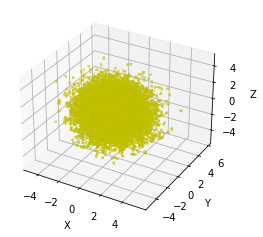

Stars positions at 100 second


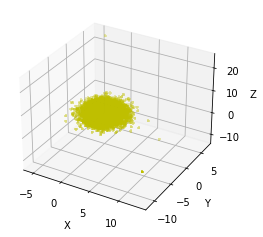

Stars positions at 200 second


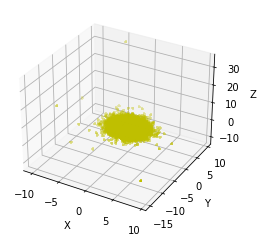

Stars positions at 300 second


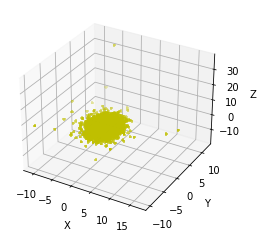

Stars positions at 400 second


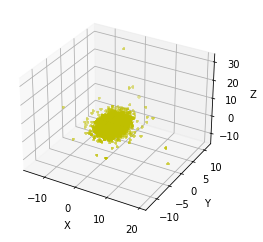

Stars positions at 500 second


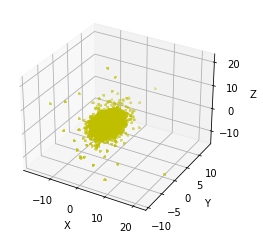

Stars positions at 600 second


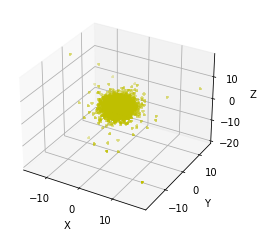

Stars positions at 700 second


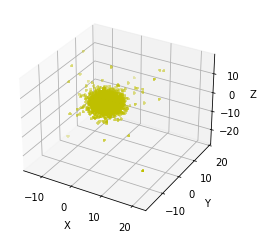

Stars positions at 800 second


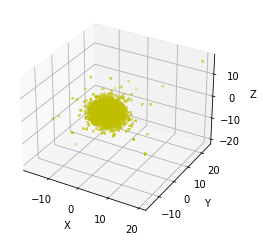

Stars positions at 900 second


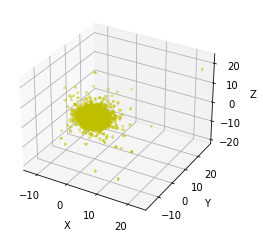

Stars positions at 1000 second


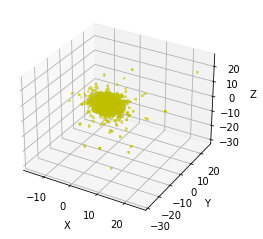

Stars positions at 1100 second


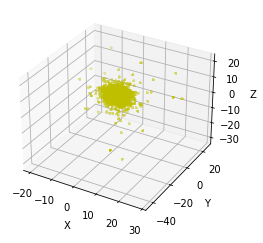

Stars positions at 1200 second


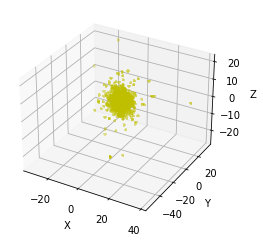

Stars positions at 1300 second


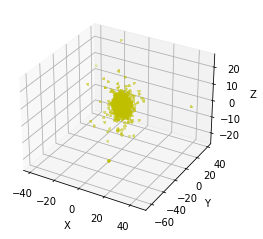

Stars positions at 1400 second


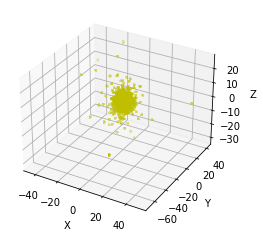

Stars positions at 1500 second


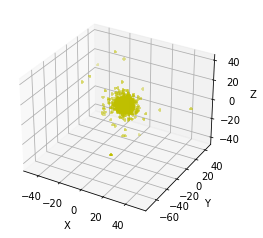

Stars positions at 1600 second


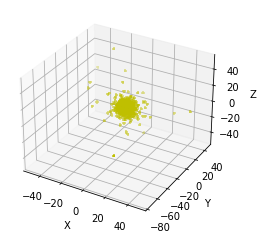

Stars positions at 1700 second


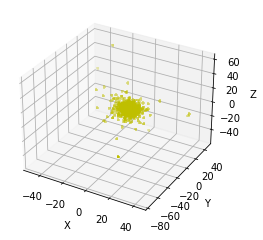

Stars positions at 1800 second


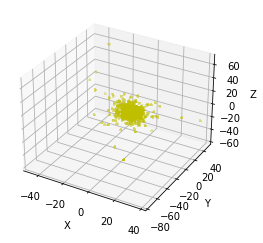

In [9]:
def vis_plot():
    for i, plott in enumerate(dane):
        print("Stars positions at {} second".format(i*100))
        Visualization(plott).star_position()
vis_plot()

Putting each position in one 2D plot.\
We can see the pathes of the stars getting away from the cluster.

C:\Users\angel\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


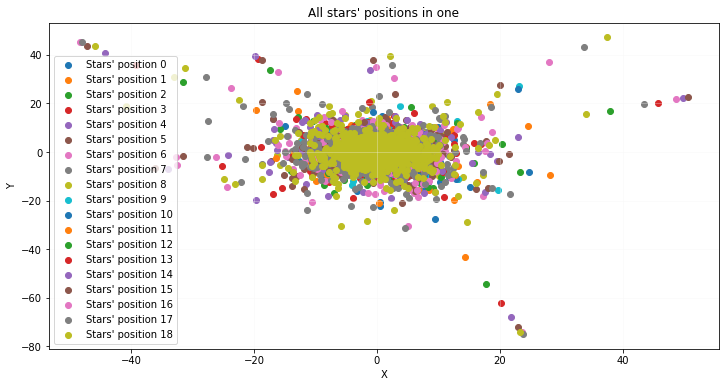

In [11]:
def all_at_one():
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)
    for i, el in enumerate(dane):
        plt.scatter(el.x, el.y, label = "Stars' position " + str(i))
        plt.grid(color='whitesmoke', alpha=0.4)
        plt.title("All stars' positions in one")
        plt.xlabel("X")
        plt.ylabel("Y")

    plt.legend()
    plt.show()

all_at_one()

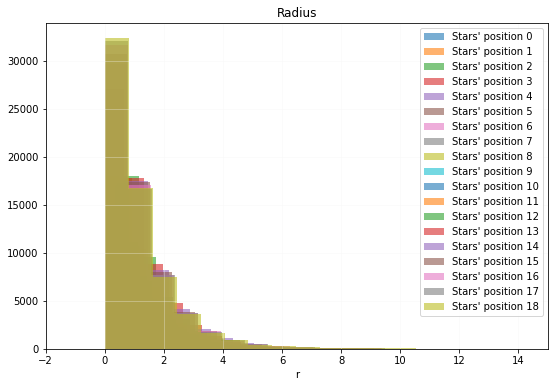

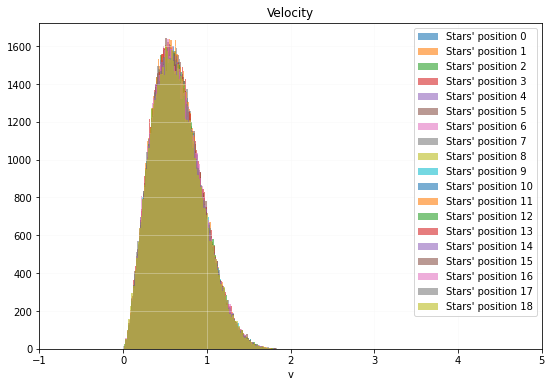

In [12]:
for i in range(len(dane)):
    # Radius
    f = plt.figure(1)
    f.set_figwidth(9)
    f.set_figheight(6)
    plt.hist(dane[i].r,100,alpha=0.6, label = "Stars' position " + str(i))
    plt.xlabel('r')
    plt.title("Radius")
    plt.legend()
    plt.grid(color='whitesmoke', alpha=0.4)
    plt.xlim(-2, 15)
    
    # Velocity
    f = plt.figure(2)
    f.set_figwidth(9)
    f.set_figheight(6)
    plt.hist(dane[i].v,100,alpha=0.6, label = "Stars' position " + str(i))
    plt.xlabel('v')
    plt.title("Velocity")
    plt.legend()
    plt.grid(color='whitesmoke', alpha=0.4)
    plt.xlim(-1, 5)

To find differences more easily, only the first and last version of clusters are inserted

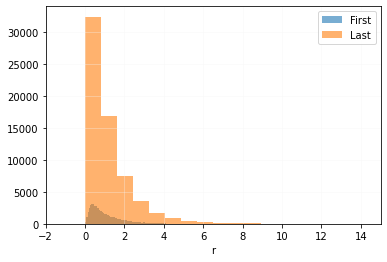

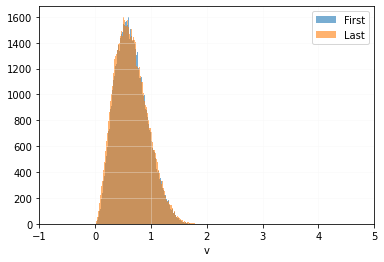

In [14]:
# Radius
plt.figure(1)
plt.hist(dane[0].r,100, alpha=0.6, label = "First")
plt.hist(dane[len(dane)-1].r,100,alpha=0.6, label = "Last")
plt.legend()
plt.grid(color='whitesmoke', alpha=0.4)
plt.xlim(-2, 15)
plt.xlabel('r')
plt.show()

# Velocity
plt.figure(2)
plt.hist(dane[0].v,100, alpha=0.6, label = "First")
plt.hist(dane[len(dane)-1].v,100,alpha=0.6, label = "Last")
plt.legend()
plt.grid(color='whitesmoke', alpha=0.4)
plt.xlim(-1, 5)
plt.xlabel('v')
plt.show()

In [15]:
print("{} stars have got out of the cluster at the end of the simulation".format(len(dane[0])-len(dane[len(dane)-1])))

30 stars have got out of the cluster at the end of the simulation


How it was going

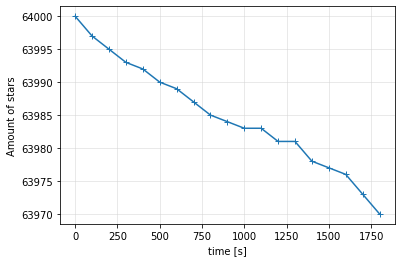

In [16]:
# dane[i]
def out_stars(data):
    starsAmount = []
    for el in data:
        starsAmount.append(len(el)) # number of stars
    time = [i*100 for i in range(len(data))]
    plt.plot(time, starsAmount, marker="+")
    plt.grid(color='lightgray', alpha=0.6)
    plt.xlabel("time [s]")
    plt.ylabel("Amount of stars")
    plt.show()
    
out_stars(dane)

Which feature defines escaping stars?
Looking for ids of these stars; \
Check their positions, velocity, mass; \
What is a difference between star about escaping and a star staying in the cluster?

In [44]:
# ids of escaping stars - the order is important;
outStars = []
def id_escaping_star(data):
    for el in data[0].id:
        if el not in data[-1].id:
            if el not in outStars:
                outStars.append(el)
    return outStars


escape = id_escaping_star(dane)
escape = escape[:-1] # 
escape = escape[::-1]
print(escape)        


LEN = len(dane[0])-len(dane[-1])


assert len(escape) == LEN, "Wrong number of stars which escaped from the cluster"


[63999, 63998, 63997, 63996, 63995, 63994, 63993, 63992, 63991, 63990, 63989, 63988, 63987, 63986, 63985, 63984, 63983, 63982, 63981, 63980, 63979, 63978, 63977, 63976, 63975, 63974, 63973, 63972, 63971, 63970]


Speed, mass and position of escaping stars

In [48]:
def amount_differences(stars1:list, stars2:list)->int: # stars1 > stars2
    return stars1 - stars2

amount = []
for i in range(len(dane)-1):
    amount.append(amount_differences(len(dane[i].id), len(dane[i+1].id)))
    
print(amount)

[3, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 3, 1, 1, 3, 3]


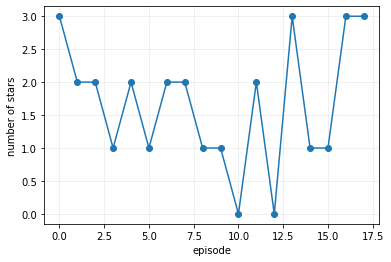

In [177]:
plt.figure(1)
plt.plot([x for x in range(len(amount))], amount, marker="o")
plt.grid(color='lightgray', alpha=0.4)
plt.ylabel('number of stars')
plt.xlabel('episode')
plt.show()

In [215]:
# firstly we will talking about out stars
# list of lists - one list -> one time interval
escapeStars = escape.copy()
def counting(escapeStars):
    starsRespectively = []
    for el in amount:
        starsRespectively.extend([escapeStars[:el]])
    #     print("starsRespectively: ", starsRespectively)
        escapeStars = escapeStars[el:]
    #     print("escapeStars", escapeStars)
    return starsRespectively, escapeStars


starsRespectively, escapeStars = counting(escapeStars)
print(starsRespectively)
print("Here are {} differences".format(len(starsRespectively)))

[[63999, 63998, 63997], [63996, 63995], [63994, 63993], [63992], [63991, 63990], [63989], [63988, 63987], [63986, 63985], [63984], [63983], [], [63982, 63981], [], [63980, 63979, 63978], [63977], [63976], [63975, 63974, 63973], [63972, 63971, 63970]]
Here are 18 differences


In [131]:
# Checking 
# last:
# print((dane[17].id - dane[18].id)) # 63970, 63971, 63972 (expected: [63972, 63971, 63970])
# first: 
# print(dane[0].id - dane[1].id) # 63997, 63998, 63999 (expected: [63999, 63998, 63997])
# order is correct

In [221]:
def list_of_stars(lista):
    temp = []
    for data in zip(dane, lista):
        temp.append(data)
    print(temp)
    return temp
    
    
tempEscape = list_of_stars(starsRespectively)

[(              x         y         z        vx        vy        vz         m  \
0      0.485939 -0.524359 -0.531982  0.461539 -0.033776 -0.322765  0.000016   
1     -0.065961  0.080844 -0.276031 -0.575780  1.107815 -0.293408  0.000016   
2     -0.034809  0.076795 -0.390880 -0.553991 -0.173861  0.059251  0.000016   
3      1.502104  1.442983  1.449747 -0.090266  0.326612 -0.310594  0.000016   
4     -0.009554  0.538341 -0.267264  0.011855 -0.011874 -0.405565  0.000016   
...         ...       ...       ...       ...       ...       ...       ...   
63995 -0.515370  0.834457  1.609291  0.317309  0.082150 -0.514357  0.000016   
63996  0.725611 -0.579058  0.973140  0.129194 -0.207819  0.259824  0.000016   
63997 -0.175569 -0.397390  0.163967 -0.137939  0.234582 -0.060062  0.000016   
63998  0.239999  0.625631  0.715540 -0.148245  0.351681  0.784334  0.000016   
63999 -0.158667 -1.150932  0.237001 -0.396418 -0.076439 -0.445377  0.000016   

          id    t         v            Ec        

Next we will talking about other stars for comparison. \
This time from the beginning so by default they are far from escaping.

In [223]:
Xrand = [x for x in range(len(escape))]
starRespectRandom, _ = counting(Xrand)
tempRandom = list_of_stars(starRespectRandom)        

[(              x         y         z        vx        vy        vz         m  \
0      0.485939 -0.524359 -0.531982  0.461539 -0.033776 -0.322765  0.000016   
1     -0.065961  0.080844 -0.276031 -0.575780  1.107815 -0.293408  0.000016   
2     -0.034809  0.076795 -0.390880 -0.553991 -0.173861  0.059251  0.000016   
3      1.502104  1.442983  1.449747 -0.090266  0.326612 -0.310594  0.000016   
4     -0.009554  0.538341 -0.267264  0.011855 -0.011874 -0.405565  0.000016   
...         ...       ...       ...       ...       ...       ...       ...   
63995 -0.515370  0.834457  1.609291  0.317309  0.082150 -0.514357  0.000016   
63996  0.725611 -0.579058  0.973140  0.129194 -0.207819  0.259824  0.000016   
63997 -0.175569 -0.397390  0.163967 -0.137939  0.234582 -0.060062  0.000016   
63998  0.239999  0.625631  0.715540 -0.148245  0.351681  0.784334  0.000016   
63999 -0.158667 -1.150932  0.237001 -0.396418 -0.076439 -0.445377  0.000016   

          id    t         v            Ec        

I want to extract rows of escaped stars only. \
Information in rows about these stars could tell the reason why those are out.

In [205]:
class Create:
    def __init__(self, lista):
        self.lista = lista
        
    def creating(self):
        allVelocity = []
        allEc = []
        allR = []


        for el in self.lista:
            print("Next element:")
            for i in el[1]:
                print("Next id:", i)
                print(el[0].to_numpy()[i])
                allVelocity.append(el[0].to_numpy()[i][-3])
        #         print("allVelocity ", allVelocity)
                allEc.append(el[0].to_numpy()[i][-2])
        #         print("allEc ", allEc)
                allR.append(el[0].to_numpy()[i][-1])
        #         print("allR ", allR)
        assert len(allVelocity) == len(allEc) == len(allR) == 30, "Wrong length of one of lists"
        return allVelocity, allEc, allR

In [222]:
# Out stars
allVelocity, allEc, allR = Create(tempEscape).creating()

Next element:
Next id: 63999
[-1.58667210e-01 -1.15093240e+00  2.37000900e-01 -3.96418240e-01
 -7.64386060e-02 -4.45377230e-01  1.56250010e-05  6.40000000e+04
  1.00000000e+02  6.01124911e-01  2.82305611e-06  1.18574453e+00]
Next id: 63998
[ 2.39998800e-01  6.25631090e-01  7.15539520e-01 -1.48244660e-01
  3.51681230e-01  7.84334360e-01  1.56250010e-05  6.39990000e+04
  1.00000000e+02  8.72259454e-01  5.94403597e-06  9.80311425e-01]
Next id: 63997
[-1.75568630e-01 -3.97389560e-01  1.63967000e-01 -1.37938840e-01
  2.34581540e-01 -6.00620960e-02  1.56250010e-05  6.39980000e+04
  1.00000000e+02  2.78680961e-01  6.06742835e-07  4.64357603e-01]
Next element:
Next id: 63996
[-7.04447980e-01 -1.07338130e+00 -1.20052130e-01 -2.53558460e-01
  3.79203710e-01 -3.77854230e-01  1.56250010e-05  6.40000000e+04
  2.00000000e+02  5.92335349e-01  2.74110303e-06  1.28949870e+00]
Next id: 63995
[ 1.80757880e-01  1.09374680e+00  6.01112250e-01 -3.79058540e-01
 -3.88059530e-01  7.00582140e-03  1.56250010e-05

In [224]:
# Beginning stars
allVelocity2, allEc2, allR2 = Create(tempRandom).creating()

Next element:
Next id: 0
[ 4.85939060e-01 -5.24358570e-01 -5.31982300e-01  4.61538940e-01
 -3.37757920e-02 -3.22764990e-01  1.56250010e-05  1.00000000e+00
  1.00000000e+02  5.64212935e-01  2.48700200e-06  8.91119435e-01]
Next id: 1
[-6.59606900e-02  8.08442380e-02 -2.76030510e-01 -5.75780090e-01
  1.10781500e+00 -2.93407650e-01  1.56250010e-05  2.00000000e+00
  1.00000000e+02  1.28252284e+00  1.28505073e-05  2.95092267e-01]
Next id: 2
[-3.48091570e-02  7.67954810e-02 -3.90879870e-01 -5.53991380e-01
 -1.73860980e-01  5.92508060e-02  1.56250010e-05  3.00000000e+00
  1.00000000e+02  5.83647794e-01  2.66128726e-06  3.99870349e-01]
Next element:
Next id: 3
[-1.80061430e-01  7.72876320e-01 -9.17831210e-02  3.17143240e-02
  4.23959430e-01  1.06319340e-01  1.56250010e-05  3.89070000e+04
  2.00000000e+02  4.38236464e-01  1.50040009e-06  7.98864235e-01]
Next id: 4
[ 1.18649670e-02  4.26582690e-01  4.85580270e-01  5.71889010e-03
 -5.81521210e-01 -8.81396010e-02  1.56250010e-05  6.00000000e+00
  2

In [207]:
# time to plots
def time_X():
    time = [i*100 for i in range(len(temp))]
    time2 = []
    tim = []
    
    it = iter(amount)
    for el in time:
        time2.append((str(el) + " ") * next(it))
    
    for element in time2:
        tim += element.split()
    return tim
        

def change_to_numbers(sth:list)->str:
    numbers = []
    for el in sth:
        numbers.append(int(el))
    return numbers


time01 = time_X()
time = change_to_numbers(time01)
print(time)


assert len(time) == 30

[0, 0, 0, 100, 100, 200, 200, 300, 400, 400, 500, 600, 600, 700, 700, 800, 900, 1100, 1100, 1300, 1300, 1300, 1400, 1500, 1600, 1600, 1600, 1700, 1700, 1700]


In [208]:
class Together:
    def __init__(self, time, vel, Ec, r):
        self.time = time
        self.vel = vel
        self.Ec = Ec
        self.r = r
        
    def plotting(self):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_figwidth(27)
        fig.set_figheight(6)
        fig.suptitle('Main information')

        ax1.plot(self.time, self.vel)
        ax1.grid()
        ax1.set_title("Velocity")
        ax1.set_xlabel("In which time")
        ax1.set_ylabel("Velocity")

        ax2.plot(self.time, self.Ec)
        ax2.grid()
        ax2.set_title("Ec")
        ax2.set_xlabel("In which time")
        ax2.set_ylabel("Ec")

        ax3.plot(self.time, self.r)
        ax3.grid()
        ax3.set_title("r")
        ax3.set_xlabel("In which time")
        ax3.set_ylabel("r")

First: Plots descrobing out stars

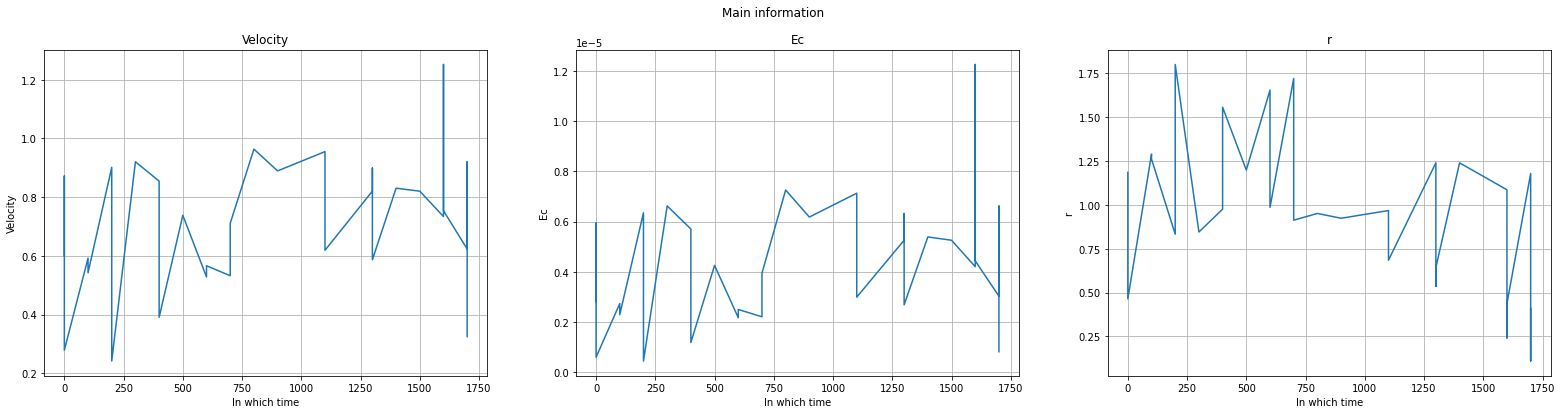

In [209]:
# Out
Together(time, allVelocity, allEc, allR).plotting()

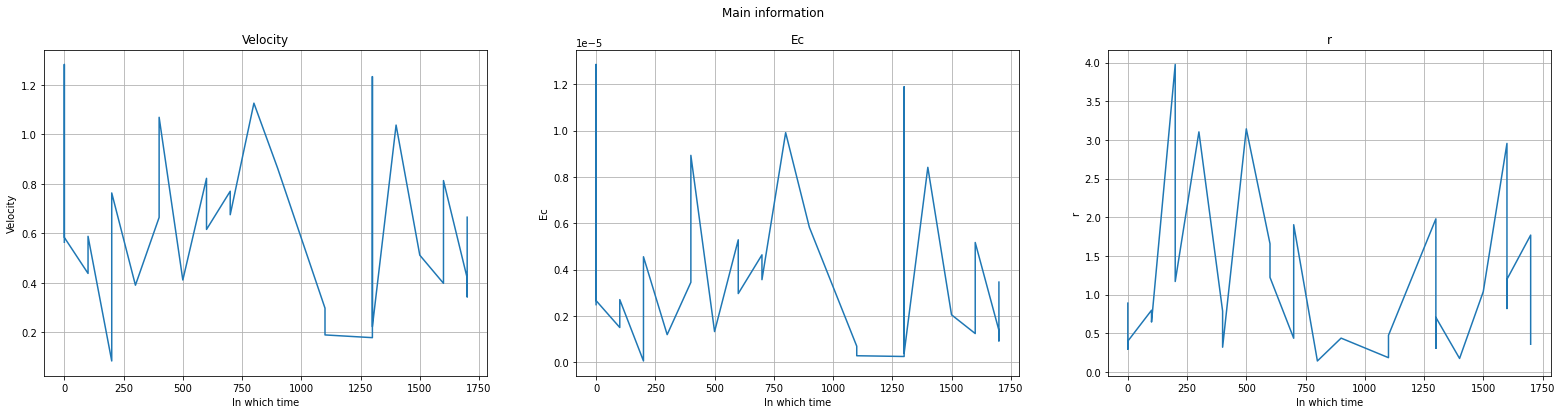

In [225]:
# beginning
Together(time, allVelocity2, allEc2, allR2).plotting()

In [236]:
import statistics

# Out vs beginning
print("Out Velocity:", statistics.mean(allVelocity), "vs In Velocity:", statistics.mean(allVelocity2))
print("Out Ec:", statistics.mean(allEc), "vs In Ec:", statistics.mean(allEc2))
print("Out r:", statistics.mean(allR), "vs In r:", statistics.mean(allR2))

Out Velocity: 0.7089358188923248 vs In Velocity: 0.6163957945711152
Out Ec: 4.324158489929682e-06 vs In Ec: 3.723240052102467e-06
Out r: 0.9826003008266879 vs In r: 1.1469516888769087


Stars which escaped moved faster and had bigger value of energy, however, the radius on average is smaller